In [ ]:
with open('/content/cleaned_hindi.txt','r', encoding='utf-8') as f:
    text = f.read()

In [ ]:
print(len(text))
text[:10000]

68216197


'चैनल एस एक बांग्ला टीवी चैनल है। यह एक मनोरंजन चैनल है।\nज़ागान, पश्चिमी पोलैंड में एक शहर है। यह शहर बोबर नदी के किनारे स्थित है।  के जनगणना के अनुसार यहाँ की आबादी  है। यह शहर ज़ागान प्रदेश की राजधानी है।\nअडोल्फ़ एन्ग्लेर रेंहोल्ड रोएहृच्त वोल्फगांग सामुएल लुकस्ज़ गर्गुलअ \n दुन्स, स्कॉटलैंड नेत्फेन, जर्मनी ओरत्रंद, जर्मनी तेल्तो, जर्मनी\nअभिनव कदम हिन्दी की एक साहित्यिक पत्रिका है। \n अक्षय जीवन  अक्षर पर्व  अक्षय जीवन  अखंड ज्योति  अनंत अविराम  अपरिहार्य  अभिनव कदम  अभिनव बालमन  अभिव्यक्ति  अर्गला  अहा जिंदगी  आकल्प  आज तक  आईबीएन खबर  आईसीएमआर  आलोचना  आविष्कार  इनकॉम  इलेक्ट्रॉनिकी आपके लिए  उर्वशी  एनडीटीवी खबर  ओशो टाइम्स  कथाक्रम  कथादेश  कथाबिम्ब  कल्याण  कालदीर्घा  कुरुक्षेत्र  खनन भारती  गद्य कोश  गीतपहल  गूगल समाचार  गृहलक्ष्मी  चकमक  चन्दामामा  चंपक   चित्रलेखा  जनोक्ति  जल चेतना  जानकी पुल  ड्रीम   तद्भव  तहलका  दायित्वबोध  दुधवा लाइव  देवपुत्र  नफा नुकसान  नंदन  नया ज्ञानोदय  नवनीत  निरोग धाम  पंजाब सौरभ     परिवेश  पहल  पर्यावरण डाइजेस्ट  पाखी  पी  न्यूज  पूर्वाभास  

In [ ]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(list(chars))
print(vocab_size)

['\n', ' ', '!', ',', '?', 'ँ', 'ं', 'ः', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऋ', 'ऌ', 'ऍ', 'ऎ', 'ए', 'ऐ', 'ऑ', 'ऒ', 'ओ', 'औ', 'क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'ऩ', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ऱ', 'ल', 'ळ', 'ऴ', 'व', 'श', 'ष', 'स', 'ह', 'ऺ', '़', 'ऽ', 'ा', 'ि', 'ी', 'ु', 'ू', 'ृ', 'ॄ', 'ॅ', 'ॆ', 'े', 'ै', 'ॉ', 'ॊ', 'ो', 'ौ', '्', 'ॐ', '॑', '॒', '॓', '॔', 'ॠ', 'ॡ', 'ॢ', 'ॣ', '।', '॥', '॰', 'ॱ', 'ॲ', 'ॻ']
95


# Making the Bigram model

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams

In [ ]:
words = text.strip().split()

In [ ]:
words[:10]

['चैनल', 'एस', 'एक', 'बांग्ला', 'टीवी', 'चैनल', 'है।', 'यह', 'एक', 'मनोरंजन']

In [ ]:
len(words)

12615305

In [ ]:
min(len(w) for w in words)

1

In [ ]:
max(len(w) for w in words)

134

In [ ]:
b={}

t=0
for w in words[:3]:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1,ch2 in zip(w,w[1:]):
        t+=1
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) +1

print(t)

5


In [ ]:
sorted(b.items(), key= lambda kv : -kv[1])

[(('च', 'ै'), 1),
 (('ै', 'न'), 1),
 (('न', 'ल'), 1),
 (('ए', 'स'), 1),
 (('ए', 'क'), 1)]

In [ ]:
N = np.zeros((94, 94), dtype=np.int32)

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
print(stoi)
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{'!': 1, ',': 2, '?': 3, 'ँ': 4, 'ं': 5, 'ः': 6, 'अ': 7, 'आ': 8, 'इ': 9, 'ई': 10, 'उ': 11, 'ऊ': 12, 'ऋ': 13, 'ऌ': 14, 'ऍ': 15, 'ऎ': 16, 'ए': 17, 'ऐ': 18, 'ऑ': 19, 'ऒ': 20, 'ओ': 21, 'औ': 22, 'क': 23, 'ख': 24, 'ग': 25, 'घ': 26, 'ङ': 27, 'च': 28, 'छ': 29, 'ज': 30, 'झ': 31, 'ञ': 32, 'ट': 33, 'ठ': 34, 'ड': 35, 'ढ': 36, 'ण': 37, 'त': 38, 'थ': 39, 'द': 40, 'ध': 41, 'न': 42, 'ऩ': 43, 'प': 44, 'फ': 45, 'ब': 46, 'भ': 47, 'म': 48, 'य': 49, 'र': 50, 'ऱ': 51, 'ल': 52, 'ळ': 53, 'ऴ': 54, 'व': 55, 'श': 56, 'ष': 57, 'स': 58, 'ह': 59, 'ऺ': 60, '़': 61, 'ऽ': 62, 'ा': 63, 'ि': 64, 'ी': 65, 'ु': 66, 'ू': 67, 'ृ': 68, 'ॄ': 69, 'ॅ': 70, 'ॆ': 71, 'े': 72, 'ै': 73, 'ॉ': 74, 'ॊ': 75, 'ो': 76, 'ौ': 77, '्': 78, 'ॐ': 79, '॑': 80, '॒': 81, '॓': 82, '॔': 83, 'ॠ': 84, 'ॡ': 85, 'ॢ': 86, 'ॣ': 87, '।': 88, '॥': 89, '॰': 90, 'ॱ': 91, 'ॲ': 92, 'ॻ': 93}
{1: '!', 2: ',', 3: '?', 4: 'ँ', 5: 'ं', 6: 'ः', 7: 'अ', 8: 'आ', 9: 'इ', 10: 'ई', 11: 'उ', 12: 'ऊ', 13: 'ऋ', 14: 'ऌ', 15: 'ऍ', 16: 'ऎ', 17: 'ए', 18: 'ऐ', 19: 'ऑ', 20: 'ऒ',

In [ ]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [ ]:
N
N = torch.from_numpy(N)

In [ ]:
# Install the Devanagari font Noto Sans Devanagari
!apt-get -qq install fonts-noto

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Find the font path for Noto Sans Devanagari
font_path = '/usr/share/fonts/truetype/noto/NotoSansDevanagari-Regular.ttf'

# Create a font property object
devanagari_font = fm.FontProperties(fname=font_path)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)


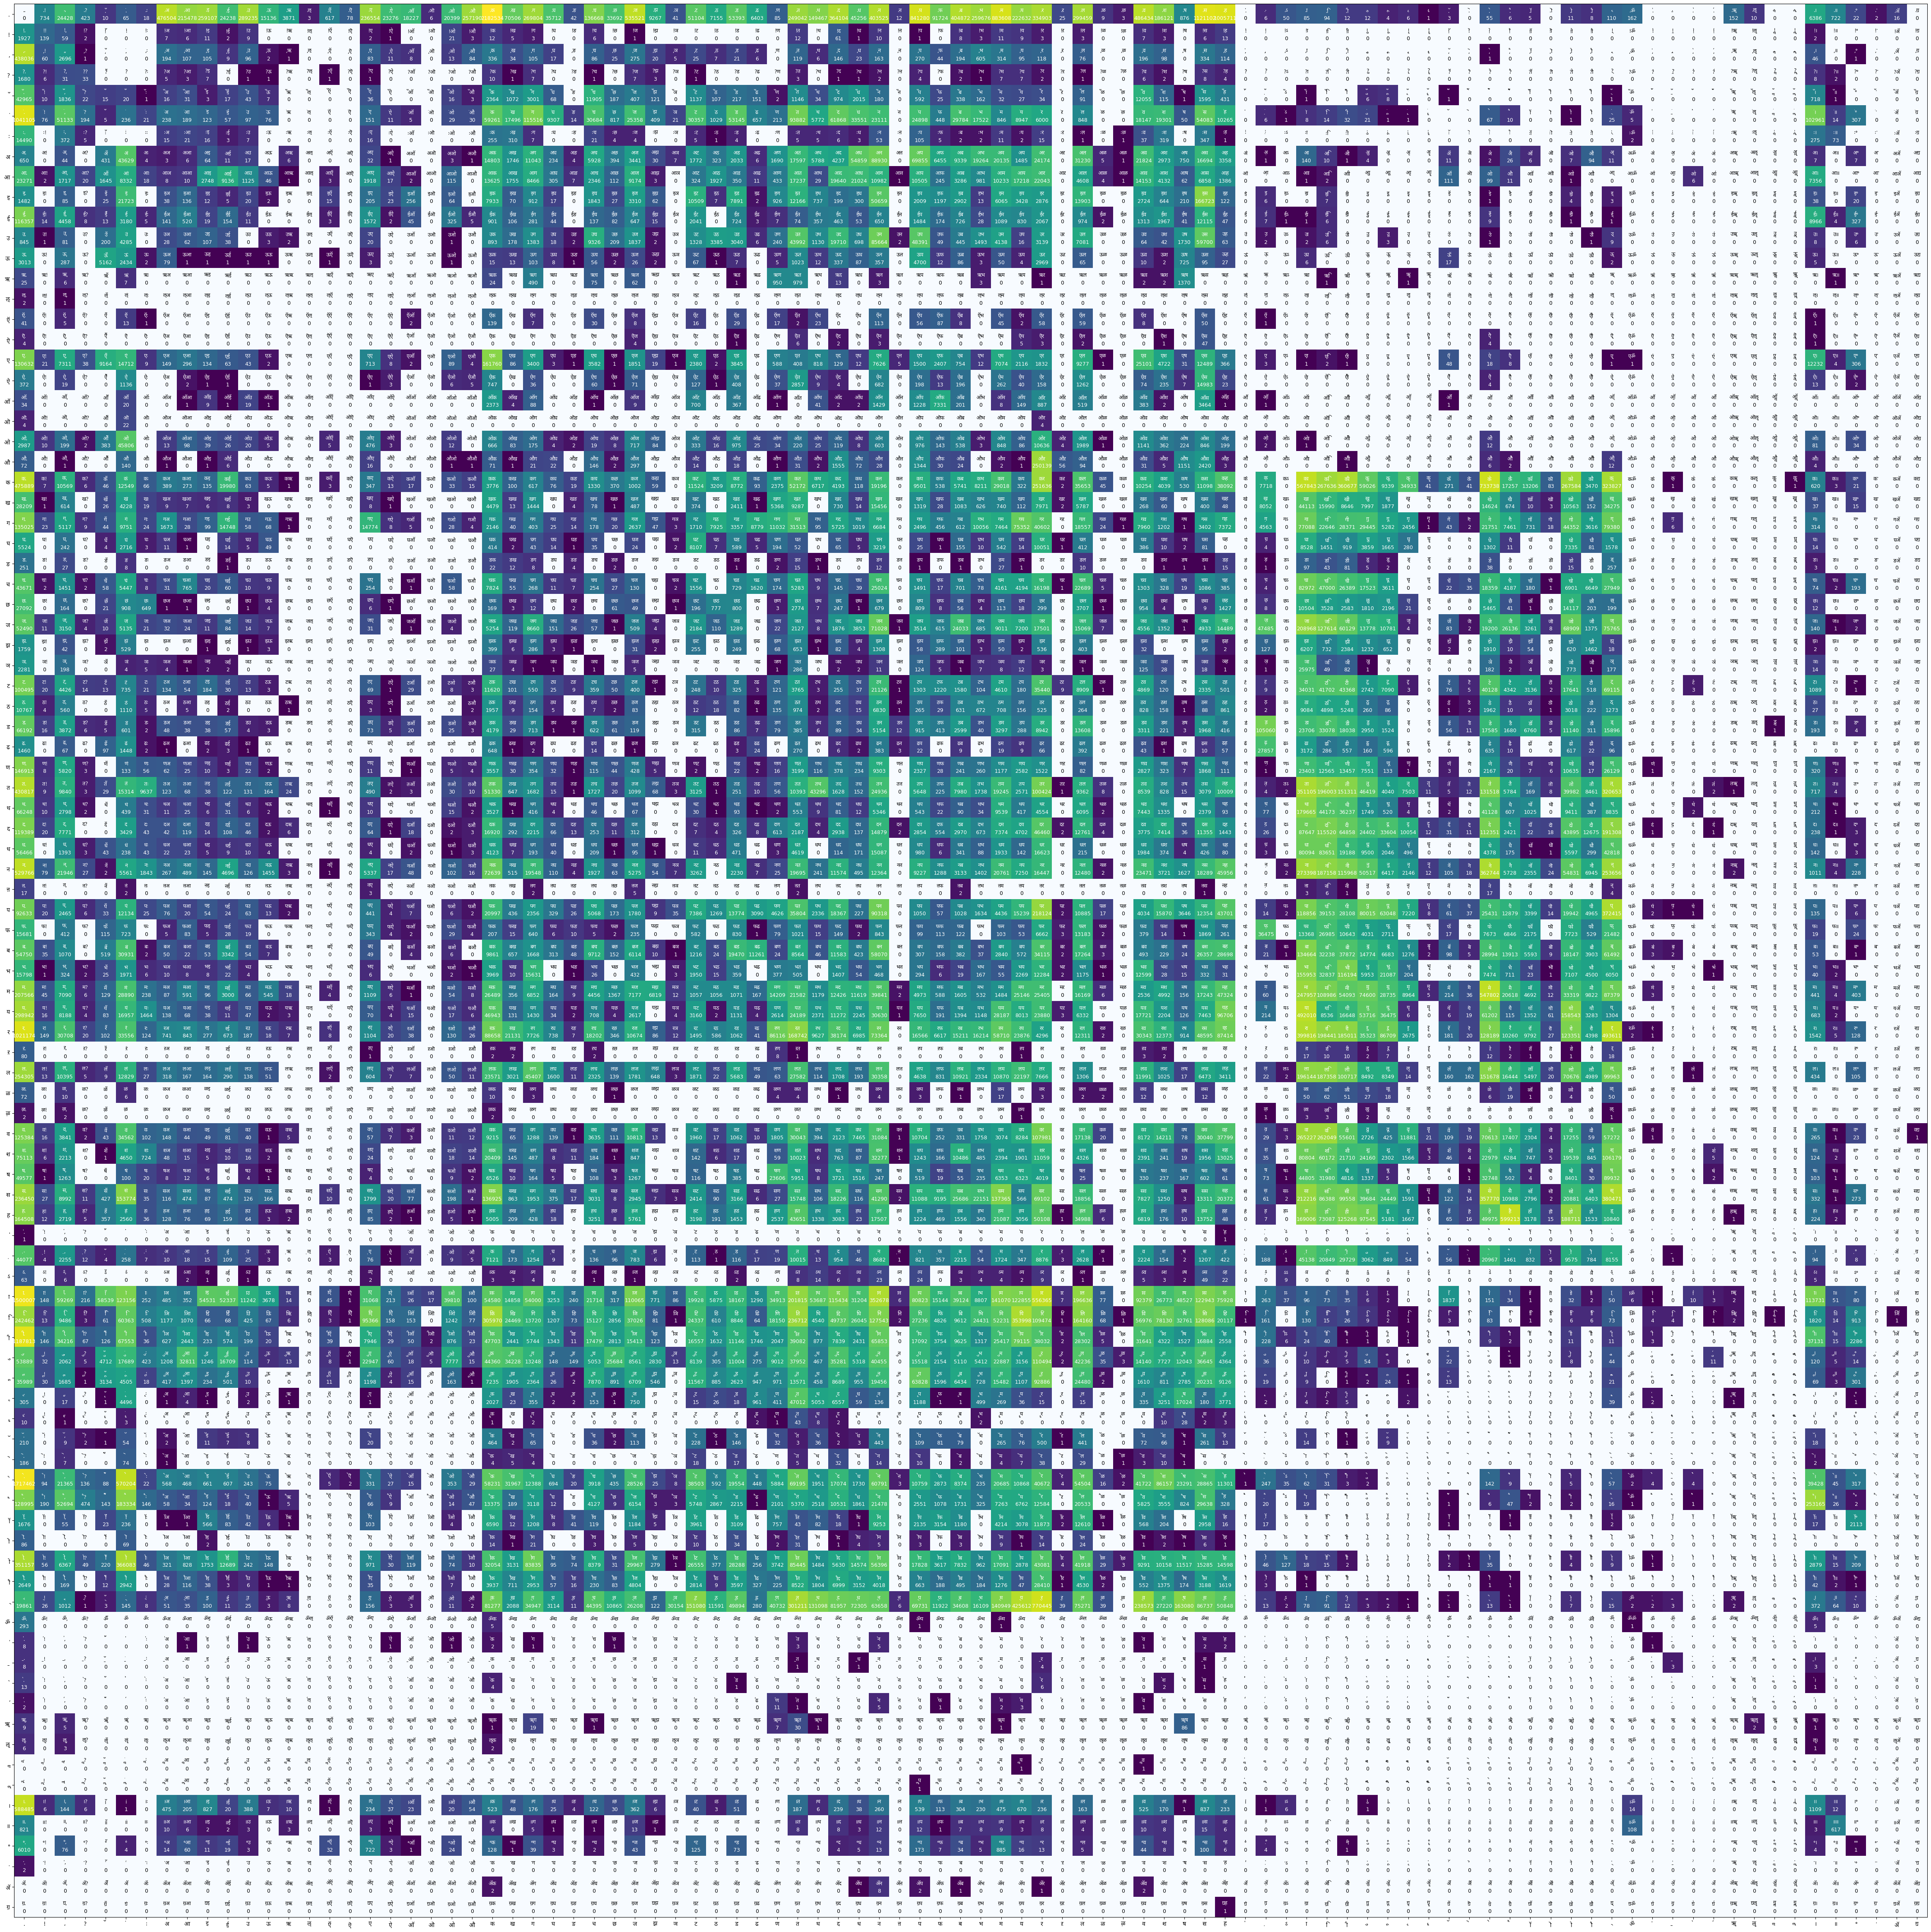

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

plt.figure(figsize=(60,60))
plt.imshow(N, cmap='Blues')
plt.imshow(N, cmap='viridis', norm=LogNorm(vmin=max(N.min(), 1), vmax=N.max()))  # no log scale

#plt.colorbar(label='Value')

indices = list(range(len(itos)))

# Set ticks and labels with Devanagari font
plt.xticks(indices, [itos[i] for i in indices], fontsize=10, fontproperties=devanagari_font)
plt.yticks(indices, [itos[i] for i in indices], fontsize=10, fontproperties=devanagari_font)

# Annotate each cell with letter pair and raw value
for i in range(len(itos)):
    for j in range(len(itos)):
        ch_pair = itos[i] + itos[j]
        val = N[i, j]
        # Letters on top half, value on bottom half inside the cell
        if val.item() == 0:
          plt.text(j, i - 0.2, ch_pair, ha='center', va='center', fontsize=9, color='black',fontproperties=devanagari_font, weight='bold')
          plt.text(j, i + 0.2, str(val.item()), ha='center', va='center', fontsize=9, color='black')
        else:
          plt.text(j, i - 0.2, ch_pair, ha='center', va='center', fontsize=9, color='white',fontproperties=devanagari_font, weight='bold')
          plt.text(j, i + 0.2, str(val.item()), ha='center', va='center', fontsize=9, color='white')

#plt.grid(False)
#plt.tight_layout()
plt.show()
plt.savefig('hindi_bigram.png')


#import warnings
#warnings.filterwarnings("WARNING:matplotlib.font_manager:findfont: Font family 'Noto Sans Devanagari' not found.")

In [ ]:
print(N[0])

tensor([      0,     734,   24428,     423,      10,      65,      18,  476504,
         215478,  259107,   24238,  289235,   15136,    3871,       3,     617,
             78,  236554,   23276,   18227,       6,   20399,  257190, 2182534,
          70506,  269804,   35712,      42,  136668,   33692,  535521,    9267,
             41,   51104,    7155,   53393,    6403,      85,  249042,  149467,
         364104,   45256,  403525,      12,  841280,   91724,  404872,  259676,
         883608,  222632,  334903,      25,  299459,       9,       3,  486434,
         186121,     876, 1121102, 1005711,       0,       6,      50,      85,
             94,      12,      12,       4,       6,       1,       3,       0,
             55,       6,       5,       0,      11,       8,     110,     162,
              0,       0,       0,       0,     152,      10,       0,       0,
           6386,     722,      22,       2,      16,       0],
       dtype=torch.int32)


In [ ]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000e+00, 5.8183e-05, 1.9364e-03, 3.3531e-05, 7.9269e-07, 5.1525e-06,
        1.4268e-06, 3.7772e-02, 1.7081e-02, 2.0539e-02, 1.9213e-03, 2.2927e-02,
        1.1998e-03, 3.0685e-04, 2.3781e-07, 4.8909e-05, 6.1830e-06, 1.8751e-02,
        1.8451e-03, 1.4448e-03, 4.7561e-07, 1.6170e-03, 2.0387e-02, 1.7301e-01,
        5.5889e-03, 2.1387e-02, 2.8308e-03, 3.3293e-06, 1.0834e-02, 2.6707e-03,
        4.2450e-02, 7.3458e-04, 3.2500e-06, 4.0510e-03, 5.6717e-04, 4.2324e-03,
        5.0756e-04, 6.7378e-06, 1.9741e-02, 1.1848e-02, 2.8862e-02, 3.5874e-03,
        3.1987e-02, 9.5123e-07, 6.6687e-02, 7.2709e-03, 3.2094e-02, 2.0584e-02,
        7.0043e-02, 1.7648e-02, 2.6547e-02, 1.9817e-06, 2.3738e-02, 7.1342e-07,
        2.3781e-07, 3.8559e-02, 1.4754e-02, 6.9439e-05, 8.8868e-02, 7.9721e-02,
        0.0000e+00, 4.7561e-07, 3.9634e-06, 6.7378e-06, 7.4513e-06, 9.5123e-07,
        9.5123e-07, 3.1708e-07, 4.7561e-07, 7.9269e-08, 2.3781e-07, 0.0000e+00,
        4.3598e-06, 4.7561e-07, 3.9634e-

In [ ]:
g = torch.Generator().manual_seed(43)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'प'

In [ ]:
g = torch.Generator().manual_seed(43)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.2889, 0.1250, 0.5861])

In [ ]:
torch.multinomial(p, num_samples=10, replacement=True, generator=g)

tensor([2, 2, 2, 0, 0, 0, 2, 0, 0, 2])

In [ ]:
p.shape

torch.Size([3])

In [ ]:
P = (torch.tensor(N)+1).float()
P /= P.sum(1, keepdims=True)

/tmp/ipython-input-4102790968.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  P = (torch.tensor(N)+1).float()


In [ ]:
P.shape

torch.Size([94, 94])

In [ ]:
P.sum(1, keepdim=True).shape

torch.Size([94, 1])

In [ ]:
P.sum(1).shape

torch.Size([94])

In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):

  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

भाकुँ.
उस्रणरास.
विे.
शलिय.
जो.
ले.
सी.
का.
यहता.
नकड्धर्चा.
हागोतै,.
औरचा.
क,.
स्ञाकिविश.
ऑफिलिंनि.
मूप्रमें.
ओंनहैक.
स्तरवताते.
सी.
कों।.


# Using MLP to produce words

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
words = open('cleaned_hindi.txt', 'r').read().strip().split()
words[:8]

['चैनल', 'एस', 'एक', 'बांग्ला', 'टीवी', 'चैनल', 'है।', 'यह']

In [ ]:
len(words)

12615305

In [ ]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: '!', 2: ',', 3: '?', 4: 'ँ', 5: 'ं', 6: 'ः', 7: 'अ', 8: 'आ', 9: 'इ', 10: 'ई', 11: 'उ', 12: 'ऊ', 13: 'ऋ', 14: 'ऌ', 15: 'ऍ', 16: 'ऎ', 17: 'ए', 18: 'ऐ', 19: 'ऑ', 20: 'ऒ', 21: 'ओ', 22: 'औ', 23: 'क', 24: 'ख', 25: 'ग', 26: 'घ', 27: 'ङ', 28: 'च', 29: 'छ', 30: 'ज', 31: 'झ', 32: 'ञ', 33: 'ट', 34: 'ठ', 35: 'ड', 36: 'ढ', 37: 'ण', 38: 'त', 39: 'थ', 40: 'द', 41: 'ध', 42: 'न', 43: 'ऩ', 44: 'प', 45: 'फ', 46: 'ब', 47: 'भ', 48: 'म', 49: 'य', 50: 'र', 51: 'ऱ', 52: 'ल', 53: 'ळ', 54: 'ऴ', 55: 'व', 56: 'श', 57: 'ष', 58: 'स', 59: 'ह', 60: 'ऺ', 61: '़', 62: 'ऽ', 63: 'ा', 64: 'ि', 65: 'ी', 66: 'ु', 67: 'ू', 68: 'ृ', 69: 'ॄ', 70: 'ॅ', 71: 'ॆ', 72: 'े', 73: 'ै', 74: 'ॉ', 75: 'ॊ', 76: 'ो', 77: 'ौ', 78: '्', 79: 'ॐ', 80: '॑', 81: '॒', 82: '॓', 83: '॔', 84: 'ॠ', 85: 'ॡ', 86: 'ॢ', 87: 'ॣ', 88: '।', 89: '॥', 90: '॰', 91: 'ॱ', 92: 'ॲ', 93: 'ॻ', 0: '.'}


In [ ]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:10]:
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([47, 3]), torch.int64, torch.Size([47]), torch.int64)

In [ ]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([54063986, 3]) torch.Size([54063986])
torch.Size([6755468, 3]) torch.Size([6755468])
torch.Size([6751021, 3]) torch.Size([6751021])


In [ ]:
C = torch.randn((94, 10)) #10

In [ ]:
emb = C[X]
emb.shape

torch.Size([47, 3, 10])

In [ ]:
W1 = torch.randn((30, 100))
b1 = torch.randn(100)

In [ ]:
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
h

tensor([[ 0.9996, -0.9781, -1.0000,  ..., -0.6952,  0.9389, -0.9585],
        [ 0.2659, -0.9928, -0.9998,  ..., -0.9993,  0.8508, -0.9999],
        [-1.0000,  0.6697,  0.9794,  ...,  0.9601,  0.5987, -0.9999],
        ...,
        [-1.0000, -1.0000,  1.0000,  ...,  1.0000,  0.9975, -0.6230],
        [-0.9999, -1.0000,  0.9744,  ...,  1.0000, -1.0000, -1.0000],
        [ 0.4288, -0.2067,  0.9691,  ..., -0.8903,  0.9662,  0.9959]])

In [ ]:
h.shape

torch.Size([47, 100])

In [ ]:
W2 = torch.randn((100, 94))
b2 = torch.randn(94)

In [ ]:
logits = h @ W2 + b2
logits.shape

torch.Size([47, 94])

In [ ]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
prob.shape
loss = -prob[torch.arange(47), Y].log().mean()
loss

tensor(24.3144)

In [ ]:
Xtr.shape, Ytr.shape

(torch.Size([54063986, 3]), torch.Size([54063986]))

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((94, 10), generator=g)
W1 = torch.randn((30, 800), generator=g)
b1 = torch.randn(800, generator=g)
#W2 = torch.randn((600,1200) generator=g)
#b2 = torch.randn(1200, generator=g)
W2 = torch.randn((800, 94), generator=g)
b2 = torch.randn(94, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in parameters)

101034

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [ ]:
lri = []
lossi = []
stepi = []

In [ ]:
for i in range(200000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (256,))

  # forward pass
  emb = C[Xtr[ix]] # (54063986, 3, 3)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (54063986, 600)
  #h2 = torch.tanh(h @ W2 + b2) (54063986,1200)
  #logits = h2 @ W3 + b3 (54063986, 94)
  logits = h @ W2 + b2 # (54063986, 94)
  loss = F.cross_entropy(logits, Ytr[ix])
  print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

Streaming output truncated to the last 5000 lines.
2.028635263442993
2.080644130706787
2.035020112991333
1.915167212486267
2.168203592300415
2.0398354530334473
2.0610570907592773
2.158522367477417
1.9965957403182983
2.2444653511047363
1.9452968835830688
2.134382963180542
1.9641441106796265
2.2232723236083984
1.8564441204071045
2.0885040760040283
2.3467414379119873
1.946760654449463
2.0818700790405273
2.1842658519744873
2.081271171569824
2.023369789123535
1.9796377420425415
1.9574284553527832
2.1875851154327393
1.9285190105438232
1.9637563228607178
2.041667938232422
2.1671435832977295
2.189669370651245
2.210808753967285
2.1623928546905518
1.9883744716644287
2.3002688884735107
2.1310489177703857
2.273494005203247
2.0367271900177
1.8834620714187622
2.2510390281677246
2.2562859058380127
2.1330597400665283
2.075960397720337
2.203792095184326
2.144390821456909
2.143702983856201
1.8361592292785645
2.097224712371826
2.127140998840332
2.033595085144043
2.0824272632598877
2.0840489864349365
2.24

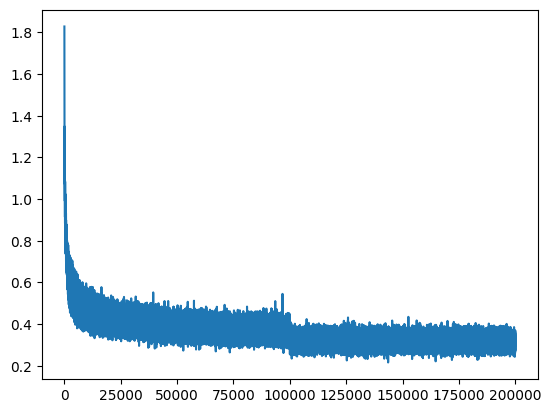

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

In [ ]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

/tmp/ipython-input-30875822.py:7: UserWarning:

Glyph 108 (l) missing from font(s) Noto Sans Devanagari.

/tmp/ipython-input-30875822.py:7: UserWarning:

Glyph 112 (p) missing from font(s) Noto Sans Devanagari.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 108 (l) missing from font(s) Noto Sans Devanagari.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 112 (p) missing from font(s) Noto Sans Devanagari.



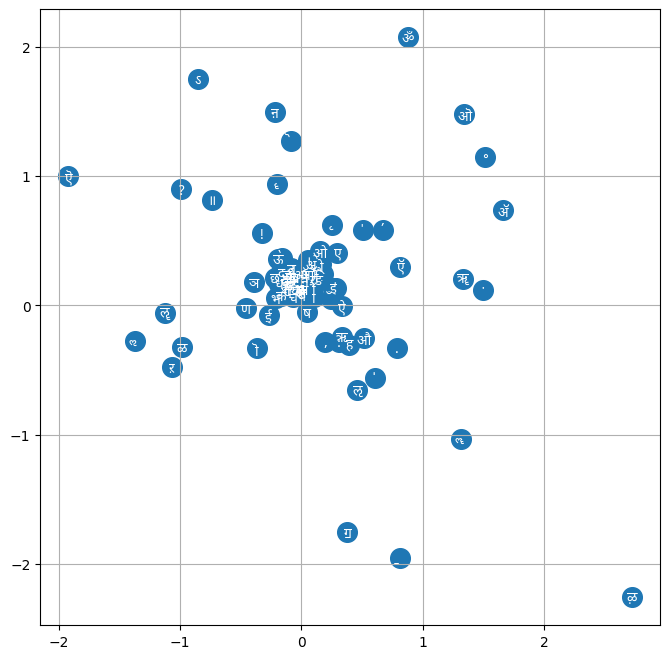

In [ ]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white', fontproperties=devanagari_font)
plt.grid('minor')
plt.savefig('hindi_lang.png')

/tmp/ipython-input-955685876.py:39: UserWarning:

Glyph 108 (l) missing from font(s) Noto Sans Devanagari.

/tmp/ipython-input-955685876.py:39: UserWarning:

Glyph 112 (p) missing from font(s) Noto Sans Devanagari.



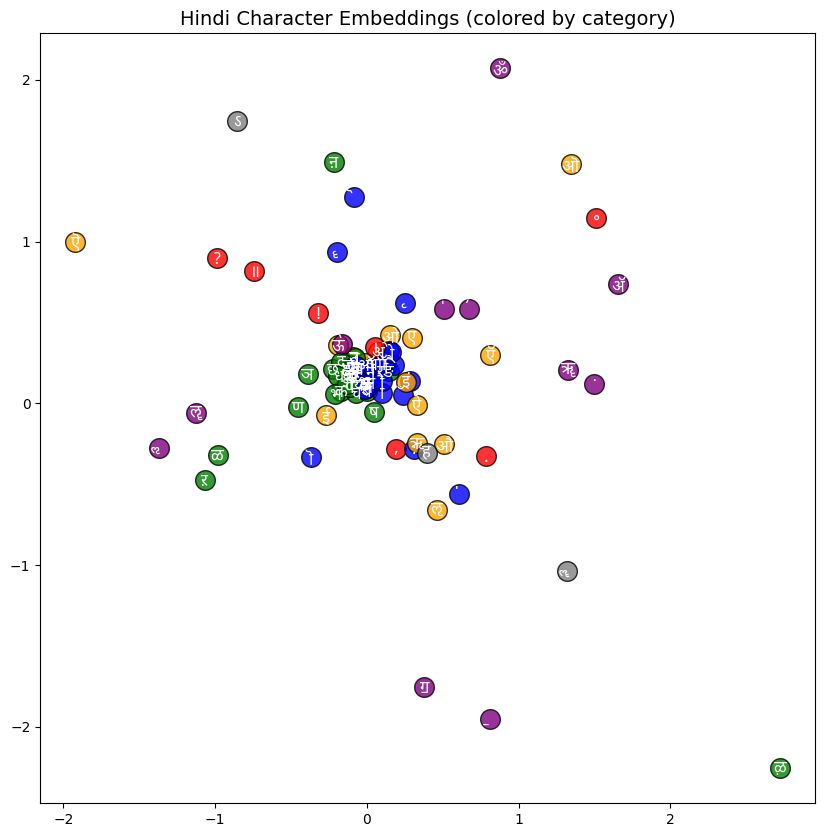

In [ ]:
# Define categories for coloring
vowels = {7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}  # अ to औ variants
consonants = set(range(23, 59))  # क to ह
diacritics = {4, 5, 6, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78}  # ँ etc.
punctuation = {0, 1, 2, 3, 88, 89, 90}  # ., !, ?, ।, ॥
symbols = set(range(79, 87)) | {91, 92, 93}  # ॐ, ॑ etc.

# Assign each index to a category color
color_map = {1: '!', 2: ',', 3: '?', 4: 'ँ', 5: 'ं', 6: 'ः', 7: 'अ', 8: 'आ', 9: 'इ', 10: 'ई',
 11: 'उ', 12: 'ऊ', 13: 'ऋ', 14: 'ऌ', 15: 'ऍ', 16: 'ऎ', 17: 'ए', 18: 'ऐ', 19: 'ऑ', 20: 'ऒ',
 21: 'ओ', 22: 'औ', 23: 'क', 24: 'ख', 25: 'ग', 26: 'घ', 27: 'ङ', 28: 'च', 29: 'छ', 30: 'ज', 31: 'झ', 32: 'ञ', 33: 'ट', 34: 'ठ', 35: 'ड', 36: 'ढ', 37: 'ण', 38: 'त', 39: 'थ', 40: 'द',
 41: 'ध', 42: 'न', 43: 'ऩ', 44: 'प', 45: 'फ', 46: 'ब', 47: 'भ', 48: 'म', 49: 'य', 50: 'र', 51: 'ऱ', 52: 'ल', 53: 'ळ', 54: 'ऴ', 55: 'व', 56: 'श', 57: 'ष', 58: 'स', 59: 'ह', 60: 'ऺ', 61: '़', 62: 'ऽ',
 63: 'ा', 64: 'ि', 65: 'ी', 66: 'ु', 67: 'ू', 68: 'ृ', 69: 'ॄ', 70: 'ॅ', 71: 'ॆ', 72: 'े', 73: 'ै', 74: 'ॉ', 75: 'ॊ', 76: 'ो', 77: 'ौ', 78: '्', 79: 'ॐ', 80: '॑', 81: '॒', 82: '॓', 83: '॔', 84: 'ॠ', 85: 'ॡ',
 86: 'ॢ', 87: 'ॣ', 88: '।', 89: '॥', 90: '॰', 91: 'ॱ', 92: 'ॲ', 93: 'ॻ', 0: '.'}
for idx in itos:
    if idx in vowels:
        color_map[idx] = "orange" #vowels
    elif idx in consonants:
        color_map[idx] = "green" #consonants
    elif idx in diacritics:
        color_map[idx] = "blue" #diatritics
    elif idx in punctuation:
        color_map[idx] = "red" #punctuation
    elif idx in symbols:
        color_map[idx] = "purple" #symbols
    else:
        color_map[idx] = "gray"  # fallback

plt.figure(figsize=(10, 10))
for i in range(C.shape[0]):
    plt.scatter(C[i, 0].item(), C[i, 1].item(),
                s=200, color=color_map[i], edgecolor="black", alpha=0.8)
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i],
             ha="center", va="center", color='white',
             fontproperties=devanagari_font, fontsize=12)

plt.grid(True, which='minor', linestyle='--', alpha=0.5)
plt.title("Hindi Character Embeddings (colored by category)", fontsize=14)
plt.savefig("hindi_lang_colored.png", dpi=300)
plt.show()


In [ ]:
import plotly.graph_objects as go
import plotly.io as pio

map = {1: '!', 2: ',', 3: '?', 4: 'ँ', 5: 'ं', 6: 'ः', 7: 'अ', 8: 'आ', 9: 'इ', 10: 'ई',
 11: 'उ', 12: 'ऊ', 13: 'ऋ', 14: 'ऌ', 15: 'ऍ', 16: 'ऎ', 17: 'ए', 18: 'ऐ', 19: 'ऑ', 20: 'ऒ',
 21: 'ओ', 22: 'औ', 23: 'क', 24: 'ख', 25: 'ग', 26: 'घ', 27: 'ङ', 28: 'च', 29: 'छ', 30: 'ज', 31: 'झ', 32: 'ञ', 33: 'ट', 34: 'ठ', 35: 'ड', 36: 'ढ', 37: 'ण', 38: 'त', 39: 'थ', 40: 'द',
 41: 'ध', 42: 'न', 43: 'ऩ', 44: 'प', 45: 'फ', 46: 'ब', 47: 'भ', 48: 'म', 49: 'य', 50: 'र', 51: 'ऱ', 52: 'ल', 53: 'ळ', 54: 'ऴ', 55: 'व', 56: 'श', 57: 'ष', 58: 'स', 59: 'ह', 60: 'ऺ', 61: '़', 62: 'ऽ',
 63: 'ा', 64: 'ि', 65: 'ी', 66: 'ु', 67: 'ू', 68: 'ृ', 69: 'ॄ', 70: 'ॅ', 71: 'ॆ', 72: 'े', 73: 'ै', 74: 'ॉ', 75: 'ॊ', 76: 'ो', 77: 'ौ', 78: '्', 79: 'ॐ', 80: '॑', 81: '॒', 82: '॓', 83: '॔', 84: 'ॠ', 85: 'ॡ',
 86: 'ॢ', 87: 'ॣ', 88: '।', 89: '॥', 90: '॰', 91: 'ॱ', 92: 'ॲ', 93: 'ॻ', 0: '.'}

# Category mapping for hover info
category_map = {}
for idx in itos:
    if idx in vowels:
        category_map[idx] = "Vowel"
    elif idx in consonants:
        category_map[idx] = "Consonant"
    elif idx in diacritics:
        category_map[idx] = "Diacritic"
    elif idx in punctuation:
        category_map[idx] = "Punctuation"
    elif idx in symbols:
        category_map[idx] = "Symbol"
    else:
        category_map[idx] = "Other"

print(category_map)

# Colors for markers
color_map_plotly = {}
for idx in itos:
    if idx in vowels:
        color_map_plotly[idx] = "orange"
    elif idx in consonants:
        color_map_plotly[idx] = "green"
    elif idx in diacritics:
        color_map_plotly[idx] = "blue"
    elif idx in punctuation:
        color_map_plotly[idx] = "red"
    elif idx in symbols:
        color_map_plotly[idx] = "purple"
    else:
        color_map_plotly[idx] = "gray"

# Create 3D scatter plot
fig = go.Figure()

for idx in itos:
    fig.add_trace(go.Scatter3d(
        x=[C[idx, 0].item()],
        y=[C[idx, 1].item()],
        z=[C[idx, 2].item()] if C.shape[1] >= 3 else [0],  # If only 2D, set Z=0
        mode='markers+text',
        text=[itos[idx]],  # actual Devanagari char
        textposition="middle center",
        textfont=dict(color='white', size=12),  # white text
        marker=dict(
            size=6,
            color=color_map_plotly[idx],
            line=dict(width=1, color='black')
        ),
        name=map[idx],
        hovertemplate=(
            f"Char: {itos[idx]}<br>"
            f"Category: {category_map[idx]}<extra></extra>"
        )
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    title="Hindi Character Embeddings (Interactive 3D)",
    legend_title="Category"
)

fig.show()
pio.write_html(fig, file="hindi_embeddings.html", auto_open=False)


{1: 'Punctuation', 2: 'Punctuation', 3: 'Punctuation', 4: 'Diacritic', 5: 'Diacritic', 6: 'Diacritic', 7: 'Vowel', 8: 'Vowel', 9: 'Vowel', 10: 'Vowel', 11: 'Vowel', 12: 'Vowel', 13: 'Vowel', 14: 'Vowel', 15: 'Vowel', 16: 'Vowel', 17: 'Vowel', 18: 'Vowel', 19: 'Vowel', 20: 'Vowel', 21: 'Vowel', 22: 'Vowel', 23: 'Consonant', 24: 'Consonant', 25: 'Consonant', 26: 'Consonant', 27: 'Consonant', 28: 'Consonant', 29: 'Consonant', 30: 'Consonant', 31: 'Consonant', 32: 'Consonant', 33: 'Consonant', 34: 'Consonant', 35: 'Consonant', 36: 'Consonant', 37: 'Consonant', 38: 'Consonant', 39: 'Consonant', 40: 'Consonant', 41: 'Consonant', 42: 'Consonant', 43: 'Consonant', 44: 'Consonant', 45: 'Consonant', 46: 'Consonant', 47: 'Consonant', 48: 'Consonant', 49: 'Consonant', 50: 'Consonant', 51: 'Consonant', 52: 'Consonant', 53: 'Consonant', 54: 'Consonant', 55: 'Consonant', 56: 'Consonant', 57: 'Consonant', 58: 'Consonant', 59: 'Other', 60: 'Diacritic', 61: 'Diacritic', 62: 'Other', 63: 'Diacritic', 64:

In [ ]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [ ]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(50):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

लाइस्मिगली.
प्रदेश.
प्रयोग.
हिस्त.
दोनसमर.
में.
में.
का.
रिष्म.
के.
ये.
विख्यापन.
यहाँ.
देतयाएं.
वि.
ऑफिस.
से.
आवश्चा.
स्थापकों.
तकब.
करने.
नाम.
कारों.
होहहद्याप्त.
दिरचें.
उसकी.
आरम.
है।.
भारती.
नममान.
रबनाय.
रूप.
का.
सबक़े.
में.
मेसारे.
तक.
पोनल.
इत्रों.
को.
काआल.
सिचाइद.
एक्र.
के.
साकार.
मदुर्तन्द.
वह.
सिद्धि.
बैट्ती.
खर्णय.
